In [1]:
import sys
sys.path.append('/Users/natalia.murycheva/PycharmProjects/gitCommitMessageCollector')

In [21]:
from typing import List
from results_analyzing.utils import get_data, BleuResults, TranslationResults
from results_analyzing.utils import get_bleu_score_for_each_pair, sort_by_bleu, plot_bleu

**Идея:**
1. давайте возьмем, что у нас нагенерировалось, что должно было нагенерироваться
2. отсортируем по bleu-score
3. нарисуем график 
4. будем смотреть на сообщения со слишком большим bleu или со слишком маленьким (ну и со средним тоже можно посмотреть)

In [4]:
!perl bleu/multi-bleu.perl ../../data/results/camel/ref.txt < ../../data/results/camel/pred.txt

BLEU = 6.01, 29.5/15.3/5.6/4.1 (BP=0.598, ratio=0.660, hyp_len=7798, ref_len=11811)
It is not advisable to publish scores from multi-bleu.perl.  The scores depend on your tokenizer, which is unlikely to be reproducible from your paper or consistent across research groups.  Instead you should detokenize then use mteval-v14.pl, which has a standard tokenization.  Scores from multi-bleu.perl can still be used for internal purposes when you have a consistent tokenizer.


In [10]:
references_file: Path = Path('../../data/results/camel/ref.txt')
predictions_file: Path = Path('../../data/results/camel/pred.txt')
perl_script_path: Path = Path('bleu/multi-bleu.perl')

In [11]:
refs, preds = get_data(references_file, predictions_file)

In [12]:
translation_results: List[TranslationResults] = get_bleu_score_for_each_pair(refs, preds, perl_script_path)

We have 1035 pairs of the translation.
We got an error on this perl output: ..


In [22]:
sorted_tr_results: List[TranslationResults] = sort_by_bleu(translation_results)

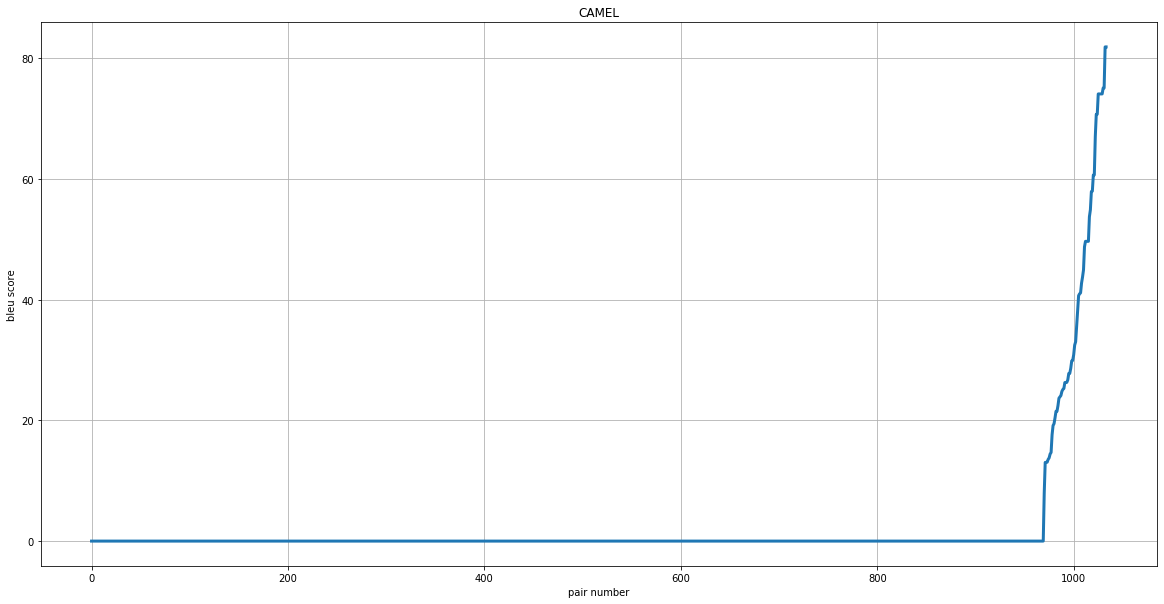

In [17]:
plot_bleu(sorted_tr_results, 'CAMEL')

In [18]:
not_almost_zero = list(filter(TranslationResults.is_bleu_not_almost_zero, sorted_tr_results))
len(not_almost_zero)

64

In [19]:
a = list(map(lambda it: print(f'BLEU: {it.result.bleu}\n'
                              f'Reference: {it.ref.strip()}.\n'
                              f'Prediction: {it.pred.strip()}\n'), 
             not_almost_zero))

BLEU: 7.91
Reference: camel <num> camel aws s <num> add a parameter to specify chunked encoding disabled option change name to the option regen docs.
Prediction: camel <num> camel aws since we are using builders we

BLEU: 13.04
Reference: camel <num> camel aws s <num> add parameters to specify s <num> client options accelerate mode option.
Prediction: camel <num> camel aws create single spring boot itests for

BLEU: 13.04
Reference: camel <num> camel aws kinesis firehose add the ability to specify credentials and region at component level.
Prediction: camel <num> camel aws use builders instead of different constructors

BLEU: 13.07
Reference: camel <num> camel aws lets adopt the same approach as camel <num> for all the components camel aws lambda.
Prediction: camel aws lets adopt the value of fixed

BLEU: 13.53
Reference: camel <num> shutdown only aws clients owned by the context aws mq.
Prediction: shutdown only aws clients

BLEU: 13.79
Reference: camel <num> camel aws kinesis firehos

In [20]:
is_zero = list(filter(TranslationResults.is_bleu_is_zero, sorted_tr_results))
len(is_zero)

970